In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy import constants
from scipy.linalg import lstsq
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
from Simbo import generate_levels, getrand, setzero, exchange, recdist, accum, calc_Eav
from Simbo import calc_Bolt_ent, calc_av_ent, calc_prob_temp, find_max, find_skips, plot_prob_temp

k_B = constants.value(u'Boltzmann constant')
h = constants.value(u'Planck constant')
c = constants.value(u'speed of light in vacuum')
nu = 500e2

<IPython.core.display.Javascript object>


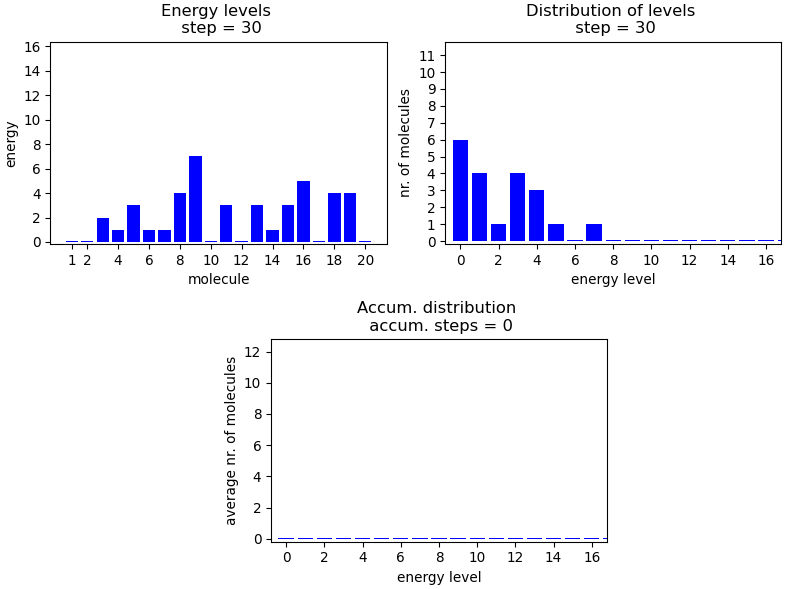

Average energy: 20.8577e-21 J
Statistical weight: 65181916800.0
Boltzmann entropy: 0.3438e-21 J/K
Temperature undefined
Average energy: 20.8577e-21 J
Statistical weight: 10475665200.0
Boltzmann entropy: 0.3185e-21 J/K
Temperature undefined
Average energy: 20.8577e-21 J
Statistical weight: 41902660800.0
Boltzmann entropy: 0.3377e-21 J/K
Temperature undefined
Average energy: 20.8577e-21 J
Statistical weight: 10475665200.0
Boltzmann entropy: 0.3185e-21 J/K
Temperature undefined
Average energy: 20.8577e-21 J
Statistical weight: 55870214400.0
Boltzmann entropy: 0.3417e-21 J/K
Temperature undefined
Average energy: 20.8577e-21 J
Statistical weight: 7759752000.0
Boltzmann entropy: 0.3144e-21 J/K
Temperature undefined
Average energy: 20.8577e-21 J
Statistical weight: 34918884000.0
Boltzmann entropy: 0.3352e-21 J/K
Temperature undefined
Average energy: 20.8577e-21 J
Statistical weight: 93117024000.0
Boltzmann entropy: 0.3487e-21 J/K
Temperature undefined
Average energy: 20.8577e-21 J
Statistical

Temperature:  2.2166 red.un. and 1594.6040 K
Average energy: 20.8577e-21 J
Statistical weight: 1466593128000.0
Boltzmann entropy: 0.3868e-21 J/K
Statistical weight: 14727352318648914.0
Average entropy: 0.5140e-21 J/K
Temperature:  2.2267 red.un. and 1601.8696 K
Average energy: 20.8577e-21 J
Statistical weight: 3910915008000.0
Boltzmann entropy: 0.4003e-21 J/K
Statistical weight: 14851470918130050.0
Average entropy: 0.5141e-21 J/K
Temperature:  2.2361 red.un. and 1608.6048 K
Average energy: 20.8577e-21 J
Statistical weight: 3910915008000.0
Boltzmann entropy: 0.4003e-21 J/K
Statistical weight: 14973322978415582.0
Average entropy: 0.5142e-21 J/K
Temperature:  2.2451 red.un. and 1615.0979 K
Average energy: 20.8577e-21 J
Statistical weight: 1676106432000.0
Boltzmann entropy: 0.3886e-21 J/K
Statistical weight: 15093418397576514.0
Average entropy: 0.5143e-21 J/K
Temperature:  2.2539 red.un. and 1621.4072 K
Average energy: 20.8577e-21 J
Statistical weight: 586637251200.0
Boltzmann entropy: 0.3

In [7]:
#run short simulation
%matplotlib notebook

nop = 20 ##user input

#initialize
istep = 0
nstot = 40*nop
nseqv = 20*nop

#automatic generation of levels
levels = generate_levels(2, nop)
maxlev, idist, dist_sum, nstep = setzero(levels)
      
#prepare graphs
fig = plt.figure(constrained_layout=True, figsize=(8, 6))
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.5)
ax1 = fig.add_subplot(gs[0, :2], )
ax2 = fig.add_subplot(gs[0, 2:])
ax3 = fig.add_subplot(gs[1, 1:3])
all_levels = []
all_distr = []
all_dist_sum = []

zero_array = []

for i in range(int(sum(levels))+1):
    zero_array.append(0.05)

#run
while istep < nstot:
    
    bef = istep
    
    #get random molecules
    ifrom, ito = getrand(nop)
    
    #exchange energy
    levels, istep = exchange(ifrom, ito, nop, levels, istep)
    
    if istep > bef: #exchange not possible sometimes (level[ifrom] = 0)
        
        #calculate distribution over energy levels
        distr, all_levels, all_distr = recdist(nop, levels, maxlev, all_levels, all_distr)
    
        #calculate accumulated distribution
        if istep > nseqv: #check if equilibrated
            
            idist, dist_sum, all_dist_sum, nstep = accum(nop, maxlev, idist, distr, dist_sum, nstep, all_dist_sum)
            calc_Eav(maxlev, distr, nop)
            calc_Bolt_ent(nop, distr)
            calc_av_ent(nop, dist_sum)#only relevant for accum. steps
            calc_prob_temp(dist_sum, nop)#only relevant for accum. steps
            nstep+=1
            
        else:
            
            all_dist_sum.append(zero_array)#make this into function?
            calc_Eav(maxlev, distr, nop)
            calc_Bolt_ent(nop, distr)
            print('Temperature undefined')

#find maxima of stored data
max_level, max_dist, max_distr_sum = find_max(all_levels, all_distr, all_dist_sum)

#animate plot data
def animation_frame(i):
    plt.rcParams.update({'font.size': 10})
    ax1.cla()

    labels1 = np.arange(1, nop+1, 1)
    trimmed_dist1 = all_levels[i]

    xrange = np.arange(0, nop+1, find_skips(nop+1))
    xticks = xrange[1:]
    xticks = [1, *xticks]
    ax1.set_xticks(xticks)
    ax1.set_yticks(np.arange(0, max_level+1, find_skips(max_level)))
    ax1.set_xlabel('molecule')
    ax1.set_ylabel('energy')
    ax1.set_ylim(-0.2, max_level+1-0.6)
    ax1.bar(x=labels1, height=trimmed_dist1, color='b')
    ax1.set_title(f'Energy levels \n step = {i}')

    ax2.cla()

    labels2 = np.arange(0, maxlev, 1)
    trimmed_dist2 = all_distr[i]
    ax2.set_xticks(np.arange(0, max_level+1, find_skips(max_level)))
    ax2.set_yticks(np.arange(0, max_dist+1, find_skips(max_dist)))
    ax2.set_ylabel('nr. of molecules')
    ax2.set_xlabel('energy level')
    ax2.set_ylim(-0.2, max_dist+1-0.2)
    ax2.set_xlim(-0.8, max_level+1-0.2)
    ax2.bar(x=labels2, height=trimmed_dist2, color='b')
    ax2.set_title(f'Distribution of levels \n step = {i}')

    ax3.cla()

    labels3 = np.arange(0, maxlev, 1)
    trimmed_dist3 = all_dist_sum[i]
    ax3.set_xticks(np.arange(0, max_level+1, find_skips(max_level)))
    ax2.set_yticks(np.arange(0, max_distr_sum, find_skips(max_distr_sum)))
    ax3.set_ylabel('average nr. of molecules')
    ax3.set_xlabel('energy level')
    ax3.set_ylim(-0.2, max_distr_sum+1-0.2)
    ax3.set_xlim(-0.8, max_level+1-0.2)
    ax3.bar(x=labels3, height=trimmed_dist3, color='b')
    if i > nseqv:
        ax3.set_title(f'Accum. distribution \n accum. steps = {i-nseqv}')
    else:
        ax3.set_title(f'Accum. distribution \n accum. steps = 0')

    plt.tight_layout()

frames_no = len(all_levels)
animation = FuncAnimation(fig, animation_frame, frames=frames_no, interval=2000, repeat=False)

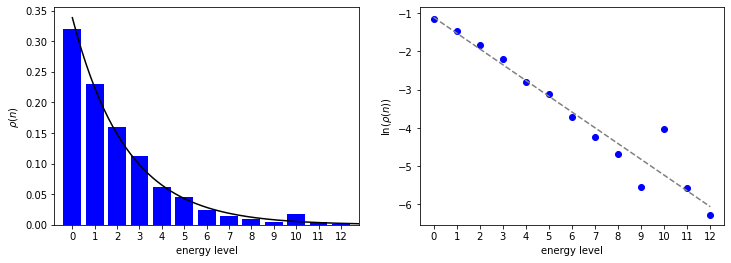

In [4]:
%matplotlib inline
plot_prob_temp(dist_sum, nop, max_level)
plt.savefig('Boltzmann.pdf')